## Importamos las librerias que vamos a utilizar

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from textblob import TextBlob
import warnings
warnings.filterwarnings("ignore")

In [33]:
# Transformamos los datasets en dataframes
calendar = pd.read_csv('Datasets/calendar.csv')
listings = pd.read_csv('Datasets/listings.csv')
reviews = pd.read_csv('Datasets/reviews.csv')

In [34]:
calendar.head(3)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,50778,2020-04-26,f,"$2,655.00","$2,655.00",5.0,1125.0
1,133654,2020-04-27,t,"$1,150.00","$1,150.00",4.0,1125.0
2,133654,2020-04-28,t,"$1,150.00","$1,150.00",4.0,1125.0


In [35]:
listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11508,https://www.airbnb.com/rooms/11508,20200426042522,2020-04-26,Amazing Luxurious Apt-Palermo Soho,NaN,LUXURIOUS NEW APT: 1 BDRM- POOL/ GYM/ SPA/ 24-...,LUXURIOUS NEW APT: 1 BDRM- POOL/ GYM/ SPA/ 24-...,none,AREA: PALERMO SOHO Minutes walking distance fr...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.27
1,12463,https://www.airbnb.com/rooms/12463,20200426042522,2020-04-26,Room in Recoleta - awesome location,My apartment is centrally located in Recoleta ...,This is a very comfortable pull-out sofa in th...,My apartment is centrally located in Recoleta ...,none,It's near the school of medicine so the street...,...,f,f,moderate,f,f,1,0,1,0,0.16


In [37]:
reviews.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,11508,1615861,2012-07-02,877808,Charlie,Amazing place!\r\n\r\nLocation: short walk to ...
1,11508,3157005,2012-12-26,656077,Shaily,Really enjoyed Candela's recommendations and q...
2,11508,3281011,2013-01-05,2835998,Michiel,Candela and her colleague were very attentive ...


-----------------------------------------------------------------------------------------------------------------------------------------------------------

#### análisamos si contiene nulos

In [38]:
def plot_null_values(df):
    # Contar valores nulos y no nulos por columna
    null_counts = df.isnull().sum()
    non_null_counts = df.notnull().sum()

    # Calcular los porcentajes
    total_counts = null_counts + non_null_counts
    null_percentage = (null_counts / total_counts) * 100
    non_null_percentage = (non_null_counts / total_counts) * 100

    # Configurar el tamaño del gráfico
    fig, ax = plt.subplots(figsize=(6, 4))

    # Crear las barras apiladas
    bars1 = ax.barh(df.columns, null_percentage, color='lightcoral', edgecolor='grey', label='Nulos')
    bars2 = ax.barh(df.columns, non_null_percentage, left=null_percentage, color='lightgreen', edgecolor='grey', label='No Nulos')

    # Añadir etiquetas y título
    ax.set_xlabel('Porcentaje')
    ax.set_title(f'Porcentaje de valores nulos y no nulos por columna')
    ax.legend()

    # Mostrar el gráfico
    plt.show()

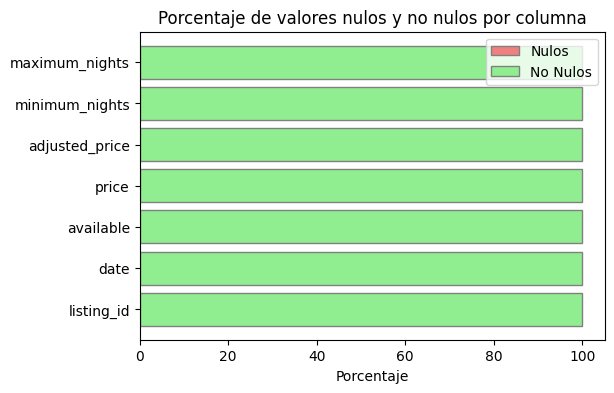

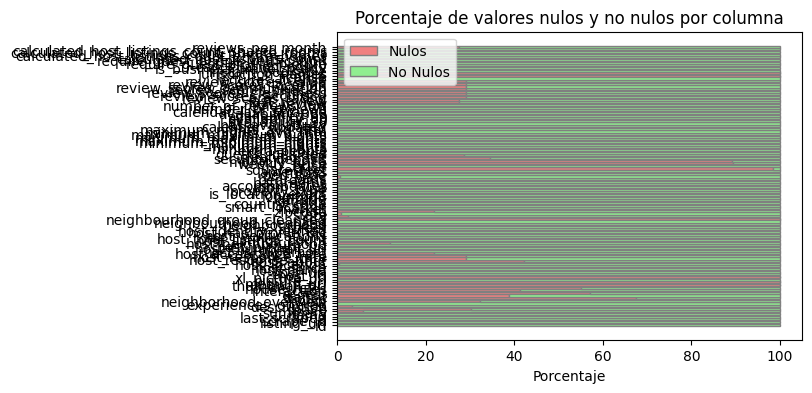

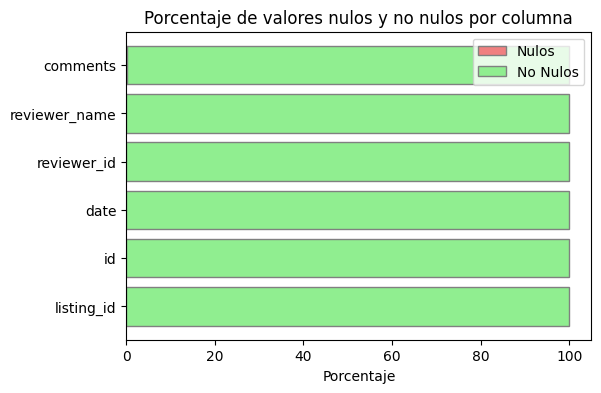

In [39]:
# Usamos la funcion para mostrar los graficos
plot_null_values(calendar)
plot_null_values(listings)
plot_null_values(reviews)

Podemos visualizar que dos de los 3 df no contienen valores nulos pero eso no quiere decir que los datos sean correctos. 
Aparte podemos ver que el df de listings contiene una gran consentracion de columnas las cuales no utilizaremos todas

--------------------------------------------------------------------------

#### Empezamos con un ETL con el DF llamado "Calendar"

In [41]:
calendar.head(3)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,50778,2020-04-26,f,"$2,655.00","$2,655.00",5.0,1125.0
1,133654,2020-04-27,t,"$1,150.00","$1,150.00",4.0,1125.0
2,133654,2020-04-28,t,"$1,150.00","$1,150.00",4.0,1125.0


Vamos a ver que contienen las columnas ('minimum_nights' y 'maximum_nights') para ver si seran utilizadas 

In [42]:
calendar['maximum_nights'].unique()

array([1.1250e+03, 4.0000e+00, 9.0000e+01, 1.8000e+02, 7.3000e+02,
       3.6000e+02, 3.6500e+02, 2.0000e+02, 1.5000e+01, 1.1240e+03,
       1.2000e+02, 9.9999e+04, 2.0000e+01, 3.0000e+01, 6.2000e+01,
       3.0000e+02, 6.0000e+01, 1.0950e+03, 1.8250e+03, 1.5000e+02,
       2.8000e+01, 7.0000e+00, 7.6000e+02, 2.5000e+01, 9.0000e+03,
       9.9900e+02,        nan, 6.0000e+00, 8.0000e+02, 7.2000e+02,
       1.7900e+02, 1.5000e+03, 6.0000e+02, 1.2000e+01, 1.8200e+02,
       1.4000e+01, 1.2500e+02, 1.0000e+01, 5.0000e+01, 1.0000e+03,
       9.4000e+01, 1.0000e+04, 5.0000e+00, 3.3000e+02, 7.0000e+01,
       3.2000e+02, 3.0000e+00, 4.5000e+01, 3.5000e+01, 2.9000e+01,
       4.0000e+01, 1.1200e+03, 1.1000e+03, 1.0000e+02, 3.1000e+01,
       3.4000e+02, 8.0000e+00, 2.1000e+02, 1.8100e+02, 3.5000e+02,
       2.7000e+01, 2.6000e+01, 2.4000e+01, 2.3000e+01, 2.2000e+01,
       2.1000e+01, 1.9000e+01, 1.8000e+01, 1.7000e+01, 1.6000e+01,
       1.3000e+01, 1.1000e+01, 9.0000e+00, 2.0000e+00, 1.0000e

In [43]:
calendar['minimum_nights'].unique()

array([5.000e+00, 4.000e+00, 2.000e+00, 1.000e+00, 3.000e+00, 1.000e+01,
       7.000e+00, 2.900e+01, 1.400e+01, 6.000e+00, 1.500e+01, 3.000e+01,
       2.000e+01, 2.500e+01, 1.200e+01, 2.800e+01, 9.000e+01, 1.800e+02,
       6.000e+01, 2.100e+01,       nan, 1.300e+01, 5.000e+01, 2.200e+01,
       1.124e+03, 9.000e+00, 4.000e+01, 3.000e+02, 8.000e+00, 1.300e+02,
       1.200e+02, 3.600e+02, 1.900e+01, 2.400e+01, 7.900e+01, 3.650e+02,
       1.100e+01, 2.600e+01, 8.900e+01, 1.700e+01, 1.600e+01, 9.000e+02,
       3.100e+01, 9.300e+01, 1.500e+02, 3.900e+01, 1.000e+02, 1.600e+02,
       4.500e+01, 1.125e+03, 2.300e+01, 6.500e+01, 5.500e+01, 8.000e+01,
       6.100e+01, 1.800e+01, 1.830e+02, 5.000e+02, 2.000e+02, 2.700e+01,
       2.100e+02, 3.590e+02, 1.100e+03, 9.100e+01, 5.700e+01, 8.500e+01,
       5.800e+01, 7.300e+02, 1.530e+02, 1.000e+03, 8.600e+01])

No van a ser utilizadas entonces las descartamos y tambien sacaremos la columna 'adjusted_price' ya que se considera innecesaria para este analisis

In [44]:
calendar.drop(['minimum_nights', 'maximum_nights', 'adjusted_price'], axis=1 , inplace=True)

In [45]:
calendar.head()

,listing_id,date,available,price
0,50778,2020-04-26,f,"$2,655.00"
1,133654,2020-04-27,t,"$1,150.00"
2,133654,2020-04-28,t,"$1,150.00"
3,133654,2020-04-29,t,"$1,150.00"
4,133654,2020-04-30,t,"$1,150.00"


Ahora cambiamos los valores de la columna 'available' para que en vez de decir t o f, diga "disponible" o "no disponible"

In [46]:
calendar['available'] = calendar['available'].replace({'t': 'disponible', 'f': 'no disponible'})
calendar.head(2)

,listing_id,date,available,price
0,50778,2020-04-26,no disponible,"$2,655.00"
1,133654,2020-04-27,disponible,"$1,150.00"


In [47]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8661286 entries, 0 to 8661285
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   listing_id  int64 
 1   date        object
 2   available   object
 3   price       object
dtypes: int64(1), object(3)
memory usage: 264.3+ MB


In [48]:
# Cambiamos el formato de la columna "date" para que quede como datatime y le cambiamos el formato
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['date'] = calendar['date'].dt.strftime('%d-%m-%Y')

In [52]:
calendar.head()

,listing_id,date,available,price
0,50778,26-04-2020,no disponible,"$2,655.00"
1,133654,27-04-2020,disponible,"$1,150.00"
2,133654,28-04-2020,disponible,"$1,150.00"
3,133654,29-04-2020,disponible,"$1,150.00"
4,133654,30-04-2020,disponible,"$1,150.00"


In [55]:
# Ahora identifico la cantidad de valores nulos que qudaron en el dataset
for column in calendar.columns:
    print(f'Hay {calendar[column].isna().sum()} valores nulos en {column}')

Hay 0 valores nulos en listing_id
Hay 0 valores nulos en date
Hay 0 valores nulos en available
Hay 0 valores nulos en price


In [50]:
# Generamos un nuevo dataset con los cambios que hicimos 
calendar.to_csv('./Datasets/Calendar_nvo.csv', index=False)

Con esto finalizamos el proceso de ETL 

------------------------------------

#### Empezamos con un ETL con el DF llamado "Reviews"

In [51]:
reviews.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,11508,1615861,2012-07-02,877808,Charlie,Amazing place!\r\n\r\nLocation: short walk to ...
1,11508,3157005,2012-12-26,656077,Shaily,Really enjoyed Candela's recommendations and q...
2,11508,3281011,2013-01-05,2835998,Michiel,Candela and her colleague were very attentive ...


In [53]:
# Cambiamos el formato de la columna "date" para que quede como datatime y le cambiamos el formato
reviews['date'] = pd.to_datetime(reviews['date'])
reviews['date'] = reviews['date'].dt.strftime('%d-%m-%Y')
reviews.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,11508,1615861,02-07-2012,877808,Charlie,Amazing place!\r\n\r\nLocation: short walk to ...
1,11508,3157005,26-12-2012,656077,Shaily,Really enjoyed Candela's recommendations and q...
2,11508,3281011,05-01-2013,2835998,Michiel,Candela and her colleague were very attentive ...


In [54]:
# Ahora identifico la cantidad de valores nulos que qudaron en el dataset
for column in reviews.columns:
    print(f'Hay {reviews[column].isna().sum()} valores nulos en {column}')

Hay 0 valores nulos en listing_id
Hay 0 valores nulos en id
Hay 0 valores nulos en date
Hay 0 valores nulos en reviewer_id
Hay 0 valores nulos en reviewer_name
Hay 176 valores nulos en comments


Procedemos a eliminar los valores nulos

In [56]:
reviews = reviews.dropna()

In [57]:
# Ahora identifico la cantidad de valores nulos que qudaron en el dataset
for column in reviews.columns:
    print(f'Hay {reviews[column].isna().sum()} valores nulos en {column}')

Hay 0 valores nulos en listing_id
Hay 0 valores nulos en id
Hay 0 valores nulos en date
Hay 0 valores nulos en reviewer_id
Hay 0 valores nulos en reviewer_name
Hay 0 valores nulos en comments


In [65]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 386923 entries, 0 to 387098
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     386923 non-null  int64 
 1   id             386923 non-null  int64 
 2   date           386923 non-null  object
 3   reviewer_id    386923 non-null  int64 
 4   reviewer_name  386923 non-null  object
 5   comments       386923 non-null  object
dtypes: int64(3), object(3)
memory usage: 20.7+ MB


In [68]:
reviews['comments'] = reviews['comments'].astype('str')

In [69]:
def analisis_sentimiento(review: str) -> int:
    analisis = TextBlob(review)
    if analisis.sentiment.polarity < 0:
        return 0  # Sentimiento negativo
    elif analisis.sentiment.polarity == 0:
        return 1  # Sentimiento neutro
    else:
        return 2  # Sentimiento positivo

In [ ]:
reviews['Analisis_Sentimientos'] = reviews['comments'].apply(analisis_sentimiento)

Ya con el analisis de sentimientos descartamos la columna comments ya que no sera utilizada en un futuro

In [76]:
reviews.drop(['comments'], axis=1 , inplace=True)
reviews.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,Analisis_Sentimientos
0,11508,1615861,02-07-2012,877808,Charlie,2
1,11508,3157005,26-12-2012,656077,Shaily,2
2,11508,3281011,05-01-2013,2835998,Michiel,2


In [77]:
# Generamos un nuevo dataset con los cambios que hicimos 
reviews.to_csv('./Datasets/Reviews_nvo.csv', index=False)

Con esto finalizamos el proceso de ETL 

----------------------------------------------

#### Empezamos con un ETL con el DF llamado "Listings"

In [121]:
listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11508,https://www.airbnb.com/rooms/11508,20200426042522,2020-04-26,Amazing Luxurious Apt-Palermo Soho,NaN,LUXURIOUS NEW APT: 1 BDRM- POOL/ GYM/ SPA/ 24-...,LUXURIOUS NEW APT: 1 BDRM- POOL/ GYM/ SPA/ 24-...,none,AREA: PALERMO SOHO Minutes walking distance fr...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.27
1,12463,https://www.airbnb.com/rooms/12463,20200426042522,2020-04-26,Room in Recoleta - awesome location,My apartment is centrally located in Recoleta ...,This is a very comfortable pull-out sofa in th...,My apartment is centrally located in Recoleta ...,none,It's near the school of medicine so the street...,...,f,f,moderate,f,f,1,0,1,0,0.16


Eliminamos las columnas que contienen mayor concentracion de nulos

In [122]:
# Ahora identifico la cantidad de valores nulos que qudaron en el dataset
for column in listings.columns:
    print(f'Hay {listings[column].isna().sum()} valores nulos en {column}')

Hay 0 valores nulos en id
Hay 0 valores nulos en listing_url
Hay 0 valores nulos en scrape_id
Hay 0 valores nulos en last_scraped
Hay 10 valores nulos en name
Hay 1384 valores nulos en summary
Hay 7194 valores nulos en space
Hay 801 valores nulos en description
Hay 0 valores nulos en experiences_offered
Hay 7665 valores nulos en neighborhood_overview
Hay 16007 valores nulos en notes
Hay 9221 valores nulos en transit
Hay 13525 valores nulos en access
Hay 9824 valores nulos en interaction
Hay 13078 valores nulos en house_rules
Hay 23729 valores nulos en thumbnail_url
Hay 23729 valores nulos en medium_url
Hay 0 valores nulos en picture_url
Hay 23729 valores nulos en xl_picture_url
Hay 0 valores nulos en host_id
Hay 0 valores nulos en host_url
Hay 3 valores nulos en host_name
Hay 3 valores nulos en host_since
Hay 103 valores nulos en host_location
Hay 10000 valores nulos en host_about
Hay 6886 valores nulos en host_response_time
Hay 6886 valores nulos en host_response_rate
Hay 5199 valores

Generamos un nuevo df con las columnas que vamos a utilizar

In [196]:
listings = listings[
    ['id', 'name', 'description', 'host_id', 'host_name', 'street', 'neighbourhood',
    'city', 'state', 'market', 'country_code', 'country', 'latitude',
    'longitude', 'is_location_exact', 'room_type', 'accommodates', 'bathrooms',
    'bedrooms', 'beds', 'bed_type', 'price','minimum_nights', 'maximum_nights', 'calendar_updated',
    'has_availability', 'availability_30', 'availability_60', 'availability_90',
    'availability_365']
]

In [193]:
# Ahora identifico la cantidad de valores nulos que qudaron en el dataset
for column in listings.columns:
    print(f'Hay {listings[column].isna().sum()} valores nulos en {column}')

Hay 0 valores nulos en id
Hay 0 valores nulos en name
Hay 0 valores nulos en description
Hay 0 valores nulos en host_id
Hay 0 valores nulos en host_name
Hay 0 valores nulos en street
Hay 0 valores nulos en neighbourhood
Hay 0 valores nulos en city
Hay 0 valores nulos en state
Hay 0 valores nulos en market
Hay 0 valores nulos en country_code
Hay 0 valores nulos en country
Hay 0 valores nulos en latitude
Hay 0 valores nulos en longitude
Hay 0 valores nulos en is_location_exact
Hay 0 valores nulos en room_type
Hay 0 valores nulos en accommodates
Hay 0 valores nulos en bathrooms
Hay 0 valores nulos en bedrooms
Hay 0 valores nulos en beds
Hay 0 valores nulos en bed_type
Hay 0 valores nulos en price
Hay 0 valores nulos en minimum_nights
Hay 0 valores nulos en maximum_nights
Hay 0 valores nulos en calendar_updated
Hay 0 valores nulos en has_availability
Hay 0 valores nulos en availability_30
Hay 0 valores nulos en availability_60
Hay 0 valores nulos en availability_90
Hay 0 valores nulos en a

In [205]:
listings = listings.dropna()

In [198]:
listings.head(3)

,id,name,description,host_id,host_name,street,neighbourhood,city,state,market,...,bed_type,price,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365
0,11508,Amazing Luxurious Apt-Palermo Soho,LUXURIOUS NEW APT: 1 BDRM- POOL/ GYM/ SPA/ 24-...,42762,Candela,"Buenos Aires, Capital Federal, Argentina",Palermo,Buenos Aires,Capital Federal,Buenos Aires,...,Real Bed,"$3,983.00",2,1125,2 months ago,t,30,60,90,365
1,12463,Room in Recoleta - awesome location,My apartment is centrally located in Recoleta ...,48799,Matt,"Buenos Aires, Capital Federal, Argentina",Recoleta,Buenos Aires,Capital Federal,Buenos Aires,...,Pull-out Sofa,"$1,593.00",1,4,22 months ago,t,30,60,90,365
2,13095,Standard Room at Palermo Viejo B&B,Palermo Viejo B&B is a typical home in one of ...,50994,Ariel,"Buenos Aires, Capital Federal, Argentina",Palermo,Buenos Aires,Capital Federal,Buenos Aires,...,Real Bed,"$2,987.00",1,365,5 months ago,t,30,60,90,365


In [199]:
listings['state'].unique()

array(['Capital Federal', 'Autonomous City of Buenos Aires',
       'Ciudad Autónoma de Buenos Aires', 'Buenos Aires',
       'Ciudad Autonoma de Buenos Aires', 'CABA', 'Palermo', 'Argentina',
       'Buenos aires', 'Ciudad de Buenos Aires', 'BS',
       'Ciudad autonoma de buenos aires',
       'Ville Autonome de Buenos Aires',
       'Ciudad Autonoma de Buenos Aires,',
       'Palermo Hollywood, Ciudad Autónoma de Buenos Aires',
       'Barrio Norte/Recoleta', 'Humberto Primero Buenos Aires',
       'capital federal.Recoleta', 'City of Buenos Aires',
       'Autonomen Stadt Buenos Aires', 'BUENOS AIRES',
       'Buenos Aires Province', 'capital federal, caballito',
       'Città Autonoma di Buenos Aires', 'Capital federal',
       'Buenos aires caba', 'C.A.B.A', 'capital federal',
       'Ciudad AutÃ³noma de Buenos Aires',
       'CIUDAD AUTONOMA DE BUENOS AIRES', 'caba', 'buenos aires',
       'Capital Federa', 'capital fedral', 'Buenos Aires City', 'Caba',
       'San Telmo,Ciudad 

In [200]:
listings['state'] = listings['state'].str.lower()

In [201]:
# Define una lista de patrones para reemplazar con los valores correctos
patterns_to_replace = {
    'capital federal': 'CABA', 
    'autonomous city of buenos aires': 'CABA', 
    'ciudad autónoma de buenos aires': 'CABA',
    'buenos aires': 'Provincia de Buenos Aires',
    'caba': 'CABA',
    'palermo': 'CABA',
    'bs': 'Provincia de Buenos Aires',
    'ciudad de buenos aires': 'CABA',
    'buenos aires province': 'Provincia de Buenos Aires',
    'ciudad autonoma de buenos aires': 'CABA',
    'city of buenos aires': 'CABA',
    'città autonoma di buenos aires': 'CABA',
    'autonomen stadt buenos aires': 'CABA',
    'distrito federal': 'CABA',
    'df': np.nan,
    'bu': np.nan,
    'villa crespo': 'CABA',
    'balbanera': 'CABA',
    'microcentro': 'CABA',
    'recoleta': 'CABA',
    'caballito': 'CABA',
    'san telmo': 'CABA',
    'muy bueno': np.nan,
    'impecable': np.nan,
    '[no name]': np.nan,
    '-1': np.nan,
    'ciudad de bs as': 'Provincia de Buenos Aires',
    'ba': 'Provincia de Buenos Aires',
    'ville autonome de buenos aires': 'CABA',
    'ciudad autonoma de buenos aires,': 'CABA',
    'palermo hollywood, ciudad autónoma de buenos aires': 'CABA',
    'barrio norte/recoleta': 'CABA',
    'humberto primero buenos aires': 'CABA',
    'capital federal.recoleta': 'CABA',
    'capital federal, caballito': 'CABA',
    'buenos aires caba': 'CABA',
    'ciudad autã³noma de buenos aires': 'CABA',
    'capital federa': 'CABA',
    'capital fedral': 'CABA',
    'buenos aires city': 'Provincia de Buenos Aires',
    'san telmo,ciudad autónoma de buenos aires': 'CABA',
    'ciudad autónoma de buenos aires ': 'CABA',
    'ciudad autónoma de bs as': 'Provincia de Buenos Aires',
    'ciudad de buenos aires/ almagro': 'CABA',
    'autonomo de buenos aires': 'Provincia de Buenos Aires',
    'buenos aires, ciudad autónoma de buenos aires': 'CABA',
    'capital federal , retiro': 'CABA',
    'c. a. b. a.': 'CABA',
    'caba. alto palermo': 'CABA',
    'caba, capital federal, buenos aires': 'CABA',
    'villa del parque, caba': 'CABA',
    ' buenos aires, capital federal': 'Provincia de Buenos Aires',
    'ciudad autónoma buenos aires': 'CABA',
    'provincia de buenos aires': 'Provincia de Buenos Aires',
    'capital (caba) palermo': 'CABA',
    'ciudad autónoma de buenos aires (caba)': 'CABA',
    'buenos aires,': 'Provincia de Buenos Aires',
    'ciudad de buenos aires (caba)': 'CABA',
    'caba recoleta': 'CABA',
    'c.a.b.a' : 'CABA'
}

# Reemplaza cada patrón en el DataFrame
for pattern, replacement in patterns_to_replace.items():
    listings['state'] = listings['state'].replace(pattern, replacement)

# Reemplaza cualquier cadena vacía con NaN
listings['state'].replace('', np.nan, inplace=True)
listings = listings.dropna()

listings['state'].unique()

array(['CABA', 'Provincia de Buenos Aires', 'argentina', nan],
      dtype=object)

In [ ]:
listings.rename(columns={'id': 'id_listings'}, inplace=True)

In [209]:
listings.columns

Index(['id_listings', 'name', 'description', 'host_id', 'host_name', 'street',
       'neighbourhood', 'city', 'state', 'market', 'country_code', 'country',
       'latitude', 'longitude', 'is_location_exact', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365'],
      dtype='object')

In [210]:
# Generamos un nuevo dataset con los cambios que hicimos 
listings.to_csv('./Datasets/Listings_nvo.csv', index=False)

------------------------------------

--------------------------------